<a href="https://colab.research.google.com/github/Phantasm320/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the TMDB 5000 dataset from Kaggle to try and cluster similar movies. 

It may be helpful to use PCA to reduce the dimensions of your data first - but then again maybe not. I dunno, you're the data scientist, you tell me. 🤪 

I'll let you download the dataset and get it into your notebook in the way that works best for you:

<https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2>

There are a few weird data cleaning steps that you'll need to do that I don't want you to get stuck on or spend a lot of time on so I'll try and help you out a little bit. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv")
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
# There's probably some pandas function that will do this but...
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)  

In [6]:
# Filter the dataframe by only the numeric columns
df_numeric = df[num_list]
print(df_numeric.head())
print(df_numeric.isnull().sum())

      budget      id  popularity     revenue  runtime  vote_average  \
0  237000000   19995  150.437577  2787965087    162.0           7.2   
1  300000000     285  139.082615   961000000    169.0           6.9   
2  245000000  206647  107.376788   880674609    148.0           6.3   
3  250000000   49026  112.312950  1084939099    165.0           7.6   
4  260000000   49529   43.926995   284139100    132.0           6.1   

   vote_count  
0       11800  
1        4500  
2        4466  
3        9106  
4        2124  
budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64


In [7]:
# lazily fill NaNs with zeros
movie_num = df_numeric.fillna(value=0, axis=1)
movie_num.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

# You take it from here!

See what you can come up with. You have all the know-how! 

In [9]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 22.4MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler.fit(movie_num)
scaled_data = scaler.transform(movie_num)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Text(0,0.5,'Second Principle Component')

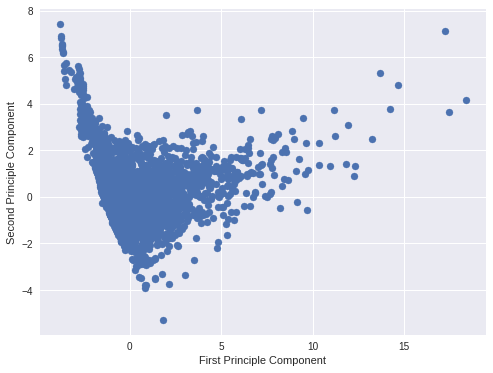

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

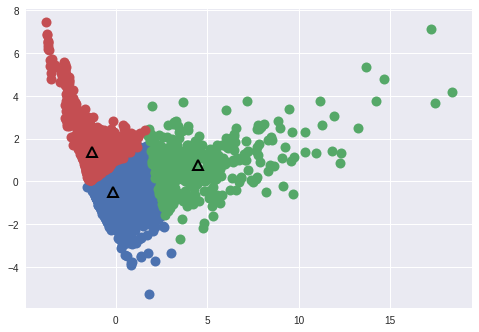

In [18]:
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2)

# Stretch Goal:

If you look at the original dataset you'll notice that I threw away some potentially useful columns. See if there are any that you could clean more effectively and turn into a numeric representation (probably some kind of one-hot-encoding of categorical variables) to assist your clustering. There's a lot more work here than the hours we have today however, so don't kill yourself trying to incorporate every single column from the original dataset, just take it one column at a time.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [0]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

In [0]:
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                   stratify=y_people, random_state=0)

In [0]:
pca = PCA(n_components=200, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=200, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0,0.5,'PCA')

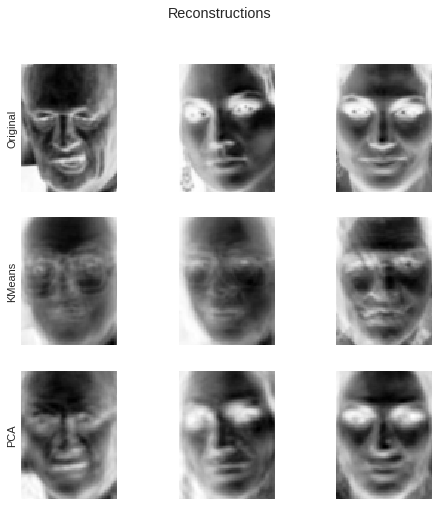

In [32]:
fig, axes = plt.subplots(3, 3, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(8,8))
fig.suptitle('Reconstructions')
for ax, orig, rec_kmeans, rec_pca in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca):
  ax[0].imshow(orig.reshape(image_shape))
  ax[1].imshow(rec_kmeans.reshape(image_shape))
  ax[2].imshow(rec_pca.reshape(image_shape))
  
axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('KMeans')
axes[2, 0].set_ylabel('PCA')